In [33]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn
print("mglearn version: {}".format(mglearn.__version__))
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

Python version: 3.6.0 |Continuum Analytics, Inc.| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
pandas version: 0.19.2
matplotlib version: 1.5.3
NumPy version: 1.11.3
SciPy version: 0.18.1
IPython version: 5.1.0
scikit-learn version: 0.18.1
mglearn version: 0.1.3


## 1.5 Linear Models for Regression

> For regression, the general prediction formula for a linear model looks as follows:

> *ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b*

> Here, x[0] to x[p] denotes the features (in this example, the number of features is p)
of a single data point, w and b are parameters of the model that are learned, and ŷ is
the prediction the model makes. For a dataset with a single feature, this is:

> *ŷ = w[0] * x[0] + b*

For Linear Regression models, the bigger the absolute values of the coefficients, the more complex the model is. In other words, the flatter the linear line, the simpler the model is.

w[0]: 0.393906  b: -0.031804


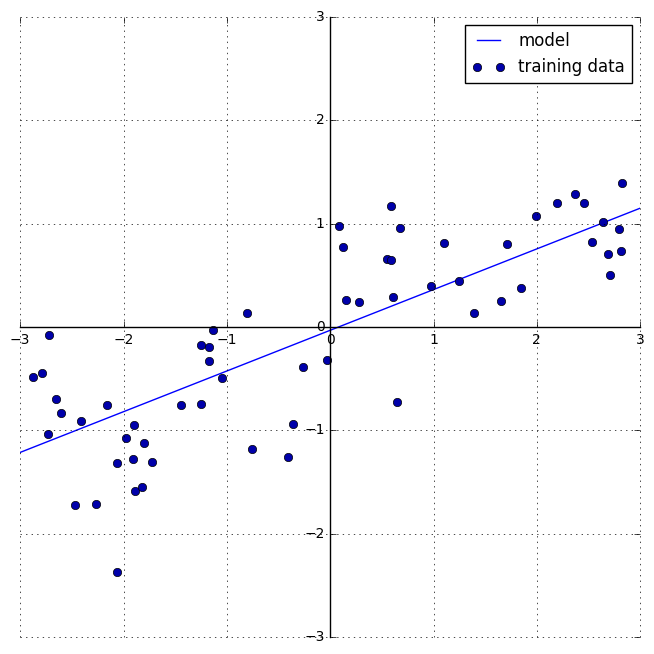

In [3]:
mglearn.plots.plot_linear_regression_wave()

**Definition of Linear Models**
> Linear models for regression can be characterized as regression models for which the
prediction is a line for a single feature, a plane when using two features, or a hyperplane
in higher dimensions (that is, when using more features).

Linear models can be extra powerful for a *wide dataset*, i.e. dataset with more features than training data points. We can start by learning the most popular regression model.

### 1.5.1 Lenear regression (aka ordinary least squares, OLS)

> Linear regression finds the parameters w and b that *minimize
the mean squared error* between predictions and the true regression targets, y, on the training set.

**Features of OLS**

+ No parameters
+ Cannot control model complexity

In [8]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

The fitted OLS model has two parameters, as below:

In [12]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

# parameters generated from the training data will have "_" at the
# tail, whereas parameters set by users don't

lr.coef_: [ 0.39390555]
lr.intercept_: -0.03180434302675973


The model's performance on training set and test set is as below:

In [13]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


The linear regression's performance on a simple dataset is not really impressive. But we will now test it on a complex **Boston Housing** dataset.

### 1.5.1.1 OLS on Boston Housing dataset

In [16]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Since OLS does not give options to **control complexity**, this model is overfitting. We will then look at an alternative to OLS, which is **Ridge Regression**.

### 1.5.2 Ridge Regression

**Ridge Regression** is the basic OLS model plus the following restriction:

> We also want ***the magnitude of coefficients
to be as small as possible***; in other words, all entries of w should be close to
zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well.

This process, called ***L2 regularization*** helps to explicitly avoid overfitting.

The sklearn uses **Ridge** class to instantiate Ridge Regressions.

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


The *default* parameter for Ridge model is alpha = 1.0. By changing the alpha value when instantiating the class, users can adjust the level of restrictions on the Ridge Regression.

**Higher Alpha** -> **Stronger restriction** -> **Parameter magnitude closer to zero**

In [19]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("\nTraining set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64

Training set score: 0.93
Test set score: 0.77


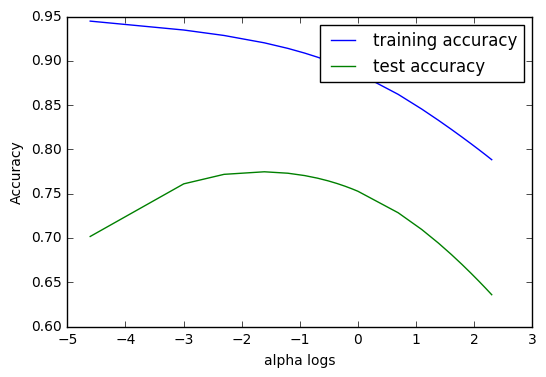

In [41]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

training_accuracy = []
test_accuracy = []

# try alpha from 0.01 to 10
alpha_settings = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

for alpha in alpha_settings:
    # build the model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(ridge.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(ridge.score(X_test, y_test))

plt.plot(np.log(np.array(alpha_settings)),
         training_accuracy, label="training accuracy")
plt.plot(np.log(np.array(alpha_settings)),
        test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha logs")
plt.legend()

As we can see from above graph, the performance of Ridge Regression model on the test set hits the highest point when the natural logarithm of the alpha is between -2 and -1. Considering the decreasing nature of the training accuracy, we should prefer an alpha within this range that is as low as possible.

In [60]:
print("log alpha array: {}".
      format(np.around(np.log(np.array(alpha_settings)),3)))
print("alpha array: {}".format(np.array(alpha_settings)))

print("Training performance: {:.5f}".format(training_accuracy[3]))
print("Test performance: {:.5f}".format(test_accuracy[3]))

log alpha array: [-4.605 -2.996 -2.303 -1.609 -1.204 -0.916 -0.693 -0.511 -0.357 -0.223
 -0.105  0.     0.693  1.099  1.386  1.609  1.792  1.946  2.079  2.197
  2.303]
alpha array: [  0.01   0.05   0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9
   1.     2.     3.     4.     5.     6.     7.     8.     9.    10.  ]
Training performance: 0.92028
Test performance: 0.77468


From the alpha arrays, we observe that the fourth alpha meets our conditions; i.e. *when alpha = 0.2*, we will see the optimized Ridge Model.

### 1.5.2.1 Under the Hood for Ridge Regressions

> We can also get a more qualitative insight into how the alpha parameter changes the
model by inspecting the **coef_ attribute of models with different values of alpha**. A
higher alpha means a more restricted model, so we expect the entries of coef_ to
have smaller magnitude for a high value of alpha than for a low value of alpha.

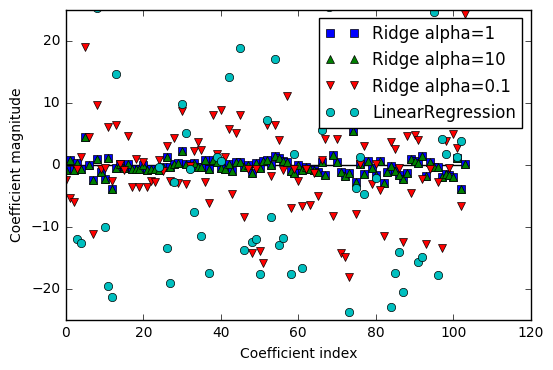

In [61]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

From above graph we can see that with alpha larger, the coefficients are most condensed near the *w=0* line.

**Learning Curves**
> Another way to understand the influence of regularization is to fix a value of alpha
but vary the amount of training data available.

> we subsampled the
Boston Housing dataset and evaluated LinearRegression and Ridge(alpha=1) on
subsets of increasing size (**plots that show model performance as a function of dataset
size are called learning curves**)

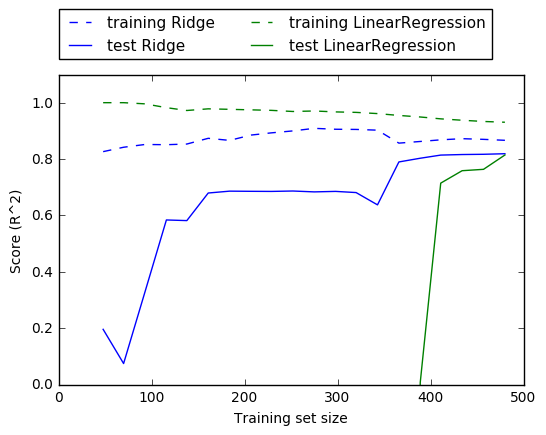

In [62]:
mglearn.plots.plot_ridge_n_samples()

> Because ridge is regularized, *the training
score of ridge is lower than the training score* for linear regression across the board.
However, **the test score for ridge is better, particularly for small subsets of the data**.
For less than 400 data points, linear regression is not able to learn anything. As more
and more data becomes available to the model, both models improve, and linear
regression catches up with ridge in the end.

**Key Takeaway**

With enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance.

### 1.5.3 Lasso Regression

**Lasso Regression** uses *L1 Regualtion* to regularize the regression. 

> The consequence of L1 regularization
is that when using the lasso, some coefficients are **exactly zero**. This means some features
are entirely ignored by the model. This can be seen as **a form of automatic feature
selection**. Having some coefficients be exactly zero often makes a model easier to
interpret, and can **reveal the most important features of your model**.

In [65]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Apparently the default setting for this *lasso regression* is underfitting on the Houston Housing dataset.

Similarly, **Lasso Regression** also has *alpha = 1.0* as its parameter. The larger alpha is, the simpler the model is.

Another parameter, *max_iter* (maximum number of iterations to run) should also be defined. The smaller alpha is, the larger max_iter should be.

In [66]:
# We increase the default setting of max_iter
# And decrease alpha
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


The adjusted model ended up using 33 out of the 105 features in the dataset. This makes it potentially easier to understand.

If we set *alpha* too low, the model will become too complicated and more similar to OLS.

In [67]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


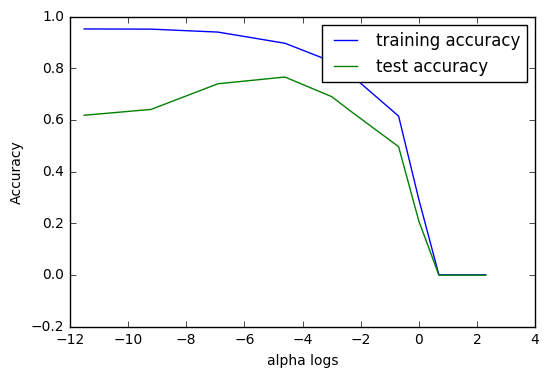

In [69]:
training_accuracy = []
test_accuracy = []

# try alpha from 0.00001 to 10
alpha_settings = [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 4, 8, 10]

for alpha in alpha_settings:
    # build the model
    lasso = Lasso(alpha=alpha, max_iter=10000000)
    lasso.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(lasso.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(lasso.score(X_test, y_test))

plt.plot(np.log(np.array(alpha_settings)),
         training_accuracy, label="training accuracy")
plt.plot(np.log(np.array(alpha_settings)),
        test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha logs")
plt.legend()

Similarly to the *redge regression*, the "sweet spot" for this specific case comes at -6 < log(alpha) < -4. We can check it out by looking at the corresponding arrays.

In [72]:
print("log alpha array: {}".
      format(np.around(np.log(np.array(alpha_settings)),3)))
print("alpha array: {}".format(np.array(alpha_settings)))

print("Sweet spot alpha: {}".format(alpha_settings[3]))
print("Training performance: {:.5f}".format(training_accuracy[3]))
print("Test performance: {:.5f}".format(test_accuracy[3]))

log alpha array: [-11.513  -9.21   -6.908  -4.605  -2.996  -2.303  -0.693   0.      0.693
   1.386   2.079   2.303]
alpha array: [  1.00000000e-05   1.00000000e-04   1.00000000e-03   1.00000000e-02
   5.00000000e-02   1.00000000e-01   5.00000000e-01   1.00000000e+00
   2.00000000e+00   4.00000000e+00   8.00000000e+00   1.00000000e+01]
Sweet spot alpha: 0.01
Training performance: 0.89651
Test performance: 0.76565


### 1.5.3.1 Under the Hood for Lasso Regressions

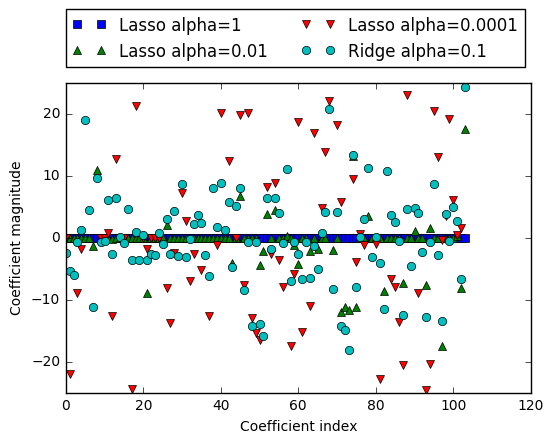

In [73]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

> In practice, **ridge regression** is usually the **first** choice between these two models.

>However, if you have **a large amount of features and expect only a few of them to be
important, Lasso** might be a better choice. Similarly, if you would like to have a
model that is **easy to interpret, Lasso will provide a model that is easier to understand**,
as it will select only a subset of the input features.